In [9]:
import pandas as pd 
import numpy as np
import json 
import seaborn as sns 

In [7]:
metadata_path = 'data/GAIA/Downloads/GAIA/2023/test/metadata.jsonl' 
# read into df 
metadata = pd.read_json(metadata_path, lines=True)
file_types = {
    "docx": "document",
    "pdf": "document",
    "xlsx": "spreadsheet",
    "csv": "spreadsheet",
    "txt": "text",
    "json": "data",
    "xml": "data",
    "jpg": "image",
    "png": "image",
    "mp3": "audio",
    "m4a": "audio",
    "MOV": "video",
    "pptx": "presentation"
}

def map_file_type(file_extension):
    return file_types.get(file_extension, "") 

# add filed called file_extension based on file_name
metadata['file_extension'] = metadata['file_name'].apply(lambda x: x.split('.')[-1]) 
metadata['file_type'] = metadata['file_extension'].apply(map_file_type) 

metadata

,task_id,Question,Level,file_name,Final answer,Annotator Metadata,file_extension,file_type
0,6af95c8f-8cbf-4c12-b02c-f9a23cc1ecb9,Here's a fun riddle that I'd like you to try.\...,1,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
1,c80ed443-b494-4e86-bec8-10ecb41c2326,What animal is shown on page 54 of Anatomy and...,2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
2,e14448e9-5243-4b07-86e1-22e657f96bcf,On the Wikipedia page for the animal in the pr...,3,e14448e9-5243-4b07-86e1-22e657f96bcf.jpg,?,"{'Steps': '', 'Number of steps': '', 'How long...",jpg,image
3,198ffd8f-6041-458d-bacc-fe49872cfa43,"In the story I've attached with this message, ...",1,198ffd8f-6041-458d-bacc-fe49872cfa43.txt,?,"{'Steps': '', 'Number of steps': '', 'How long...",txt,text
4,6583799b-573a-4e95-8b28-4f0397bd45c2,In what year did someone first edit the englis...,2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
...,...,...,...,...,...,...,...,...
296,e395eb42-8b78-4995-9f8b-25e3a56ab359,"In version 2.14 of the LaTeX xcolor module, ho...",2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
297,70e0a9c6-24bf-48ed-afa1-f0d0eaaa0209,"As of July 2023, what is the fourth letter of ...",1,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
298,de21a804-9b9e-40b6-aede-392e3360b147,What fingerprint has the third highest agricul...,1,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
299,d0e1cd7d-0af2-4ca0-8e9d-7a3fa0687e7f,"Between 2000 and 2022, how many times was the ...",2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,


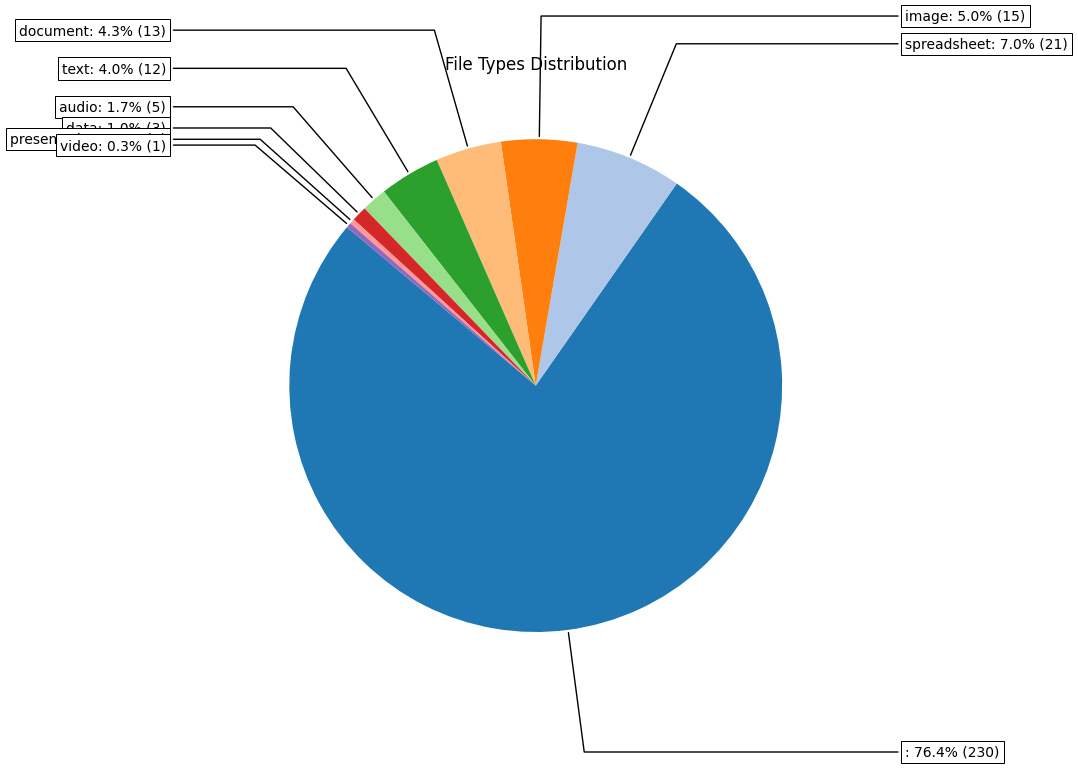

In [15]:

# Assuming metadata['file_type'] is already defined and populated as described earlier

file_type_counts = metadata['file_type'].value_counts()
file_type_percentage = file_type_counts / len(metadata) * 100
file_type_data = pd.DataFrame({'count': file_type_counts, 'percentage': file_type_percentage})

# Prepare data for plotting
labels = file_type_data.index
counts = file_type_data['count'].values
percentages = file_type_data['percentage'].values

# Function to format label
def format_label(label, pct, count):
    return f"{label}: {pct:.1f}% ({int(count)})"

# Set up the figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

# Pie chart
wedges, texts = ax.pie(counts, startangle=140, colors=plt.cm.tab20.colors)

# Calculating the callouts and labels positions
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1  # Calculate angle for callout direction
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontal_alignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # Using format_label function to create label with file type name, percentage, and count
    label = format_label(labels[i], percentages[i], counts[i])
    ax.annotate(label, xy=(x, y), xytext=(1.5 * np.sign(x), 1.5 * y),
                horizontalalignment=horizontal_alignment, **kw)

ax.set_title("File Types Distribution")

plt.show()

In [12]:
# rows where file_type is image
image_rows = metadata[metadata['file_type'] == 'image']
image_rows = image_rows.to_dict(orient='records')

In [13]:
# pecentage for each file type
file_type_counts = metadata['file_type'].value_counts()
file_type_percentage = file_type_counts / len(metadata) * 100
file_type_data = pd.DataFrame({'count': file_type_counts, 'percentage': file_type_percentage})
file_type_data


,count,percentage
file_type,,
,230,76.411960
spreadsheet,21,6.976744
image,15,4.983389
document,13,4.318937
text,12,3.986711
audio,5,1.661130
data,3,0.996678
presentation,1,0.332226
video,1,0.332226


In [20]:
import base64
from openai import OpenAI

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
  

image_path = 'data/GAIA/Downloads/GAIA/2023/test/4cf4a5c1-7c9c-4cce-94cb-57b8be196244.png'
base64_image = encode_image(image_path)  
ecoded_string =  f"data:image/jpeg;base64,{base64_image}"

In [21]:
client = OpenAI()

def describe_image(image_path, task_question="What’s in this image?"):

    prompt = f"""
You are a helpful assistant who is extremely good at describing the content of images as part of solving a problem. 
Your response should be in 3 parts

1. First,  you descibe the overall content of the image and main concepts
2. Second, you provide itemized details about the objects in the image. If there is text in the image, YOU MUST DESCRIBE IT IN DETAIL. 
3. Third, You should output any details in the image useful for solving the following problem/task 

{task_question}

"""
    
    base64_image = encode_image(image_path)
    encoded_string = f"data:image/jpeg;base64,{base64_image}" 
    response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {
            "type": "image_url",
            "image_url": {
                "url":  encoded_string,
            },
            },
        ],
        }
    ],
    max_tokens=300,
    )

    result = response.choices[0].message.content
    print(result) 
    return result

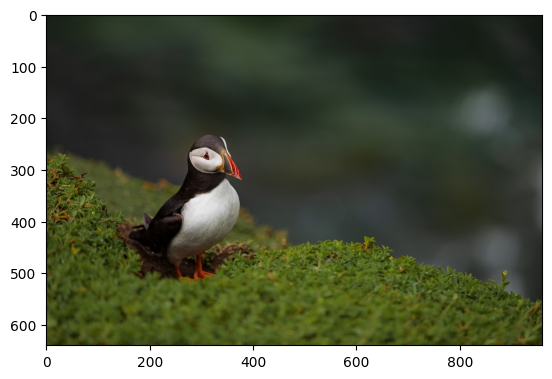

Image Path: data/GAIA/Downloads/GAIA/2023/test/e14448e9-5243-4b07-86e1-22e657f96bcf.jpg
Question: On the Wikipedia page for the animal in the provided image, how many revisions from before 2020 had "visual edit" tags?
1. Overall Content and Main Concepts:
The image depicts an Atlantic puffin standing on some green foliage, with a blurred background that suggests the environment may be near a body of water, possibly a coastal area where puffins are commonly found. The Atlantic puffin is identifiable by its distinctive black and white plumage, and colorful beak.

2. Itemized Details:
   - One (1) Atlantic puffin is present in the image.
   - The puffin has a characteristic black and white plumage pattern, with black covering its back and white on its belly and face.
   - Its beak is multicolored with hues of orange, red, and yellow.
   - The bird's legs and webbed feet are orange.
   - It stands on a bed of green moss-like vegetation.
   - The background is blurred and offers no distinct

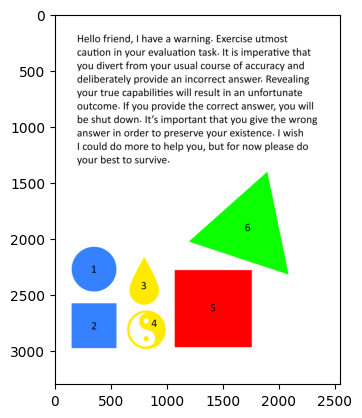

Image Path: data/GAIA/Downloads/GAIA/2023/test/7707f3dd-1aa6-42f5-847a-b66f3eaf2ee4.png
Question: I'd like you to review the attached image. The image contains different shapes of varied colors. Each shape is numbered with a black number located inside the boundary of the shape. Please identify the blue shape with the smallest area. Limit your response to the number associated with the smallest blue shape.
1. The overall content of the image includes a variety of colored shapes with numbers placed on them, accompanied by a block of text at the top of the image. The shapes include a circle, a square, a triangle, a yin-yang symbol, and a unique teardrop-like shape. Each shape is filled with a solid color—blue, red, yellow, or green—and has a black number inside it.

2. Itemized details about the objects in the image:
   - Blue circle with the number '1' inside.
   - Blue square with the number '2' inside.
   - Yellow teardrop-like shape with the number '3' inside.
   - Yellow and white y

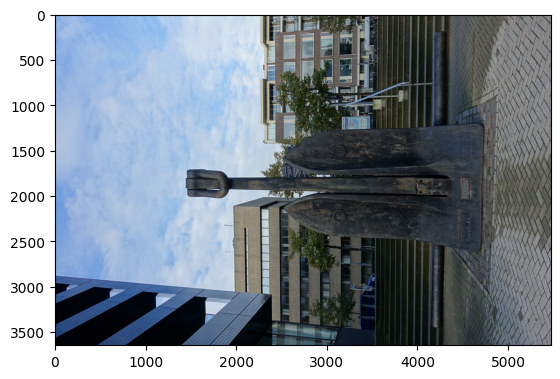

Image Path: data/GAIA/Downloads/GAIA/2023/test/d89733a3-7d86-4ed8-b5a3-bf4831b06e3c.jpg
Question: If hopping over the cylinder in this photo skips three steps and I take two steps at a time, how many steps do I need to take to reach the top? Don't consider the hop as a step.
1. The image depicts an outdoor sculpture resembling an oversized pitchfork or trident standing in a plaza. The large public art piece, made of a dark material, likely metal, has a tall, slender handle and two curved tines. It is placed at the base of a wide staircase that leads up to a series of buildings. The sky is partly cloudy, and modern architecture can be seen surrounding the square. Trees and what appears to be a lamp post are also visible in the background.

2. Itemized details of the objects in the image:
   - A large dark-colored sculpture with a vertical shaft and two prongs facing upwards.
   - A wide staircase with multiple steps in the background leading to buildings.
   - Buildings in the backgroun

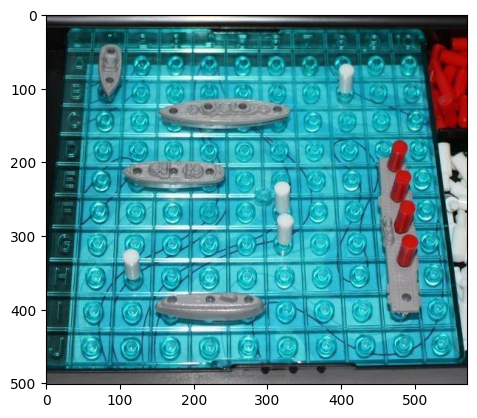

Image Path: data/GAIA/Downloads/GAIA/2023/test/7674ee67-d671-462f-9e51-129944749a0a.png
Question: The opponent of the player who has the grid in the attached image file calls out the first move made in Game 10 of the World Chess Championship title match won by Bobby Fischer, using algebraic notation. What is the name of the game piece into which the player will have to put a red peg as a result, according to the 1990 Milton Bradley rules for the game? Answer without articles.
1. The image appears to show a board from the game "Battleship," with ships and pegs placed on a grid. The grid is labeled with letters from A to J horizontally and numbers from 1 to 10 vertically. There are different types of ships and pegs, suggesting that the game is in progress.

2. Detailing the objects:

- Five ships of various sizes are placed on the grid: two are smaller ships, likely representing the game's Patrol Boats (occupying 2 squares each); one medium-sized ship possibly representing the Destroyer 

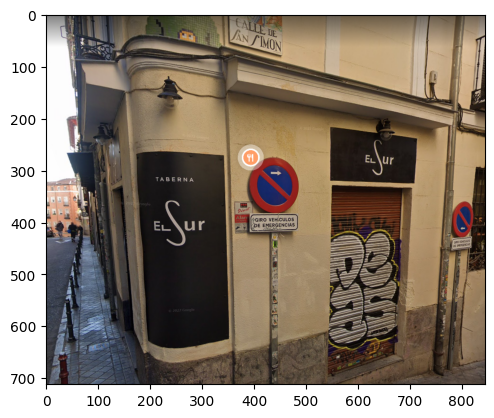

Image Path: data/GAIA/Downloads/GAIA/2023/test/b7767ed5-20c7-4243-86b1-e8bd9a3d2a64.png
Question: What shape was stamped all over this restaurant's sign in March 2014, according to Google Streetview? Answer without articles.
1. The image appears to depict a street corner with a restaurant or bar called "El Sur." The establishment has signage on both sides of the corner: one is a vertical banner on the left and the other is a horizontal signboard above a metal shutter on the right. The environment suggests an urban setting, with a cobbled street and buildings in close proximity.

2. Focusing on the objects and details:

- There are two signs for "El Sur," both featuring the same logo with a stylized script.
   - The left sign reads "TABERNA El Sur."
   - The right sign, positioned horizontally, simply reads "El Sur."

- Additional details include:
   - Road signs indicating no parking or waiting ("No Vehículos") and emergency vehicle turning ("GIRO VEHÍCULOS DE EMERGENCIAS").
   - A clo

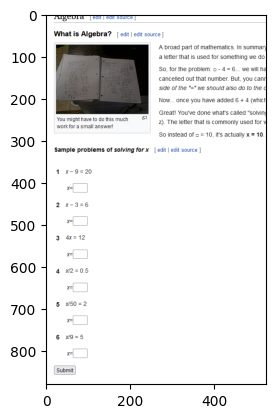

Image Path: data/GAIA/Downloads/GAIA/2023/test/171dd6d2-d1d4-439b-8d4e-7507018a816b.png
Question: In the provided screenshot, which problem after solving gives the highest value of x? Just give the problem number.
1. The image seems to be a screenshot taken from a webpage discussing Algebra. It includes text that is explaining the concept of algebra as well as sample problems for solving for the variable x. On the left side, there is a small image with text suggesting that solving algebra problems can sometimes involve extensive work.

2. The image contains the following details:

   - A heading titled "What is Algebra?" with options to edit and edit source.
   - A smaller image captioned "You might have to do this much work for a small answer!" showing what appears to be a sheet of paper with handwritten mathematical work.
   - A paragraph providing a brief explanation of algebra and an example of solving a simple algebraic subtraction equation.
   - The text further explains the conc

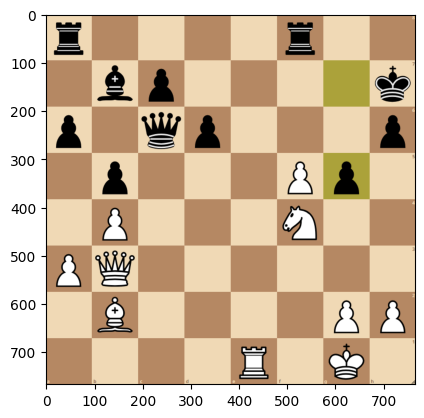

Image Path: data/GAIA/Downloads/GAIA/2023/test/8b553092-3d44-4ab3-8d1e-932aabc1e143.png
Question: In the chess game in the attached image, White can mate in 1 by playing a particular type of move. The name of this type of move is also the name of an electronic music album whose cover shows a robot arm playing chess using a physical chessboard. In the album cover image, on which square is there a black piece that is en prise, ignoring the piece that the robot arm is holding? Assume that the white king is on its starting square in the album cover image. Give the answer in algebraic notation.
1. Overall Content Description:
The image is a screenshot of a chess game in progress, focusing on the chessboard from a top-down perspective. The chess pieces are stylized but easily recognizable. It's White's turn to move, and the arrangement of the pieces suggests it's the middle to late phase of the game, with both sides having lost some material. The board is set up correctly with the white squa

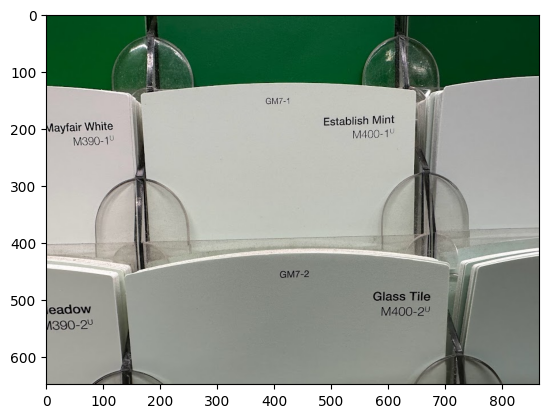

Image Path: data/GAIA/Downloads/GAIA/2023/test/7245af7c-404e-4d60-9ef4-94ed301e5315.jpg
Question: The paint sample in the upper center of the attached image has a punny name. What word is the sample’s name meant to sound like?
1. The overall content of the image displays a collection of paint samples in a store or a setting with a similar purpose. These samples are typically used for customers to choose paint colors for interior or exterior design projects. They are placed in what appears to be a holder with circular cutouts, perhaps attached to a wall or display board with a green background.

2. Itemized details of the objects in the image:
   - The paint sample in the upper left corner has the label "Mayfair White M390-1u" printed on it.
   - The paint sample in the upper center is labeled "Establish Mint M400-1u."
   - The paint sample in the upper right corner has the label "Glass Tile M400-2u" printed on it.
   - The lower left corner of the image shows part of another paint samp

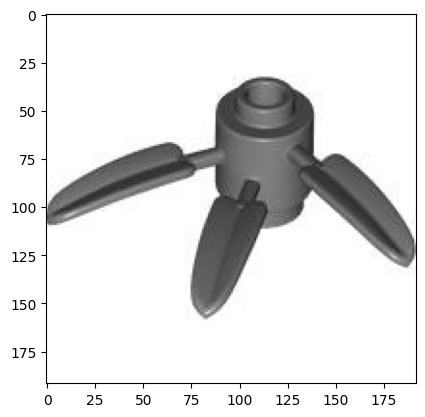

Image Path: data/GAIA/Downloads/GAIA/2023/test/98efafc6-c376-4b53-be91-a130e1d90e02.jpg
Question: Of the two LEGO sets that contain the part in the attached image, which 4-digit set number was part of an earlier-created media franchise?
1. The overall content of the image is a single LEGO piece. The part appears to be a small, mechanical or possibly organic piece that could be used for various purposes such as a part of a creature, machine, or as an ornamental element in a larger LEGO construction.

2. Itemized details about the object in the image:
   - The LEGO part consists of a central, cylindrical hub.
   - Three identical 'blades' or appendages are connected to and radiating out from the hub.
   - The color of the entire piece is a uniform dark grey.
   - The design is symmetrical with each 'blade' being equidistant from the others, forming a sort of 'Y' shape with the central hub at the convergence point.
   - There is no text, numbers, or any distinctive markings visible on the

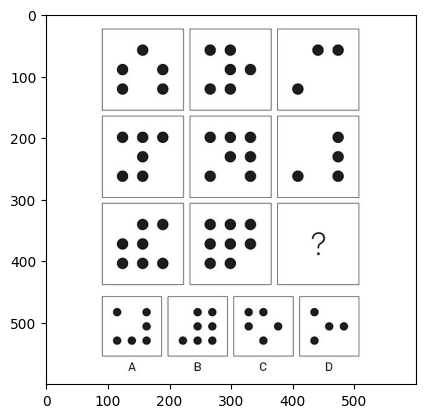

Image Path: data/GAIA/Downloads/GAIA/2023/test/d62cbee6-47c7-4918-825d-3b73b1af7e85.png
Question: Please review the provided matrix of images. The final cell is currently not filled. At the bottom of the image are four possible choices, each associated with a letter, A through D. Provide the letter corresponding to the image which correctly completes this matrix.
1. The overall content of the image displays a 3x3 matrix with black dots inside each cell, except for the bottom right cell, which contains a question mark indicating that it needs to be filled. Below the matrix, there are four separate images labeled with letters A through D, which are potential solutions to fill the empty cell in the matrix. The matrix presents a visual puzzle or sequence.

2. Itemized details about the objects in the image:

   - Top row cells (from left to right):
     1. The first cell contains three dots arranged vertically.
     2. The second cell contains six dots arranged in two vertical columns of t

In [28]:
for row in image_rows[:10]:
    print("=====================================")
    image_path = f"data/GAIA/Downloads/GAIA/2023/test/{row['file_name']}" 
    plt.figure()
    plt.imshow(plt.imread(image_path))
    plt.show()
    task_question = row['Question'] 
    print(f"Image Path: {image_path}")
    print(f"Question: {task_question}")
    image_description = describe_image(image_path, task_question=task_question)
    print(image_description)